In [4]:
import pandas as pd
import numpy as np
import nltk
import re
from textblob.classifiers import NaiveBayesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
data = np.array(data)

labels = data[:,1]
data = data[:,3]

def filtering(text, stopwords = nltk.corpus.stopwords.words("english")):
    text = str(text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"WWW\S+", "", text)
    
    text = text.split(" ")
    
    filtered = ""
    for i in range(len(text)):
        if not (text[i] == '' or text[i] in stopwords):
            filtered = (filtered + " " + text[i])
            
    return str(filtered)


for i in range(len(data)):
    data[i] = filtering(data[i])

data = np.reshape(data, (len(data),1))
labels = np.reshape(labels, (len(labels),1))
train = np.concatenate((data, labels),axis=1)

train = train[:4000] #Modify based on how much memory your machine has (larger number = more running time but better results)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\icy58\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
classifier = NaiveBayesClassifier(train) 

In [6]:
classifier.classify("")

'worry'

In [7]:
data2 = pd.read_csv("Dataset2.csv")
data2 = np.array(data2)

labels2 = data2[:,1]
data2 = data2[:,0]

filtered_labels = []
filtered_data = []

for i in range(len(labels2)):
    curr_label = labels2[i]
    curr_label = str(curr_label)
    label_arr = curr_label.split(",")
    
    for x in range(len(label_arr)):
        filtered_labels.append(label_arr[x])
        filtered_data.append(data2[i])
        
for i in range(len(filtered_data)):
    filtered_data[i] = filtering(filtered_data[i])

filtered_data = np.reshape(filtered_data, (len(filtered_data),1))
filtered_labels = np.reshape(filtered_labels, (len(filtered_labels),1))
train = np.concatenate((filtered_data, filtered_labels),axis=1)

train = train[:5000] #Modify based on how much memory your machine has (larger number = more running time but better results)

In [8]:
classifier = NaiveBayesClassifier(train) 

In [9]:
s = SentimentIntensityAnalyzer()

In [30]:
def clean(filename):
    f = open(filename, 'r')
    text_to_analyize = f.read()
    text_to_analyize = text_to_analyize.replace('\n',"")
    text_to_analyize = text_to_analyize.replace("  "," ")
    text_to_analyize = text_to_analyize.replace("  "," ")
    text_to_analyize = text_to_analyize.replace("  "," ")
    text_to_analyize = text_to_analyize.replace("  "," ")
    text_to_analyize = text_to_analyize.strip()
    text_to_analyize = text_to_analyize.split(".")
    return text_to_analyize
text_to_analyize = clean('text.txt')

In [31]:
values = np.zeros(28)
overall_sentiment = 0
total = 0 
chunks = 15
running_avg = []
sentiments = []
for i in range(70):
    total += 1
    currstr = ""
    for x in range(chunks):
        currstr += text_to_analyize[i*5 + x]
        currSenti = s.polarity_scores(text_to_analyize[i*5 + x])["compound"]
        overall_sentiment += currSenti
        sentiments.append(currSenti)
        running_avg.append(overall_sentiment/len(sentiments))
    emotion = classifier.classify(currstr)
    emotion = int(emotion)
    values[emotion] += 1


In [14]:
print("Admiration Score: " + str(values[0]))
print("Amusement Score: " + str(values[1]))
print("Anger Score: " + str(values[2]))
print("Annoyance Score: " + str(values[3]))
print("Approval Score: " + str(values[4]))
print("Caring Score: " + str(values[5]))
print("Confusion Score: " + str(values[6]))
print("Curiosity Score: " + str(values[7]))
print("Desire Score: " + str(values[8]))
print("Disappointment Score: " + str(values[9]))
print("Disapproval Score: " + str(values[10]))
print("Disgust Score: " + str(values[11]))
print("Embarrassment Score: " + str(values[12]))
print("Excitement Score: " + str(values[13]))
print("Fear Score: " + str(values[14]))
print("Gratitude Score: " + str(values[15]))
print("Grief Score: " + str(values[16]))
print("Joy Score: " + str(values[17]))
print("Love Score: " + str(values[18]))
print("Nervousness Score: " + str(values[19]))
print("Optimism Score: " + str(values[20]))
print("Pride Score: " + str(values[21]))
print("Realization Score: " + str(values[22]))
print("Relief Score: " + str(values[23]))
print("Remorse Score: " + str(values[24]))
print("Sadness Score: " + str(values[25]))
print("Surprise Score: " + str(values[26]))
print("Neutral Score: " + str(values[27]))
print("Total:" + str(total))


print(overall_sentiment/(total*chunks))

Admiration Score: 0.0
Amusement Score: 0.0
Anger Score: 5.0
Annoyance Score: 2.0
Approval Score: 3.0
Caring Score: 13.0
Confusion Score: 9.0
Curiosity Score: 3.0
Desire Score: 0.0
Disappointment Score: 1.0
Disapproval Score: 3.0
Disgust Score: 0.0
Embarrassment Score: 0.0
Excitement Score: 0.0
Fear Score: 0.0
Gratitude Score: 0.0
Grief Score: 0.0
Joy Score: 7.0
Love Score: 1.0
Nervousness Score: 0.0
Optimism Score: 12.0
Pride Score: 0.0
Realization Score: 7.0
Relief Score: 0.0
Remorse Score: 0.0
Sadness Score: 2.0
Surprise Score: 2.0
Neutral Score: 0.0
Total:70
0.03652266666666669


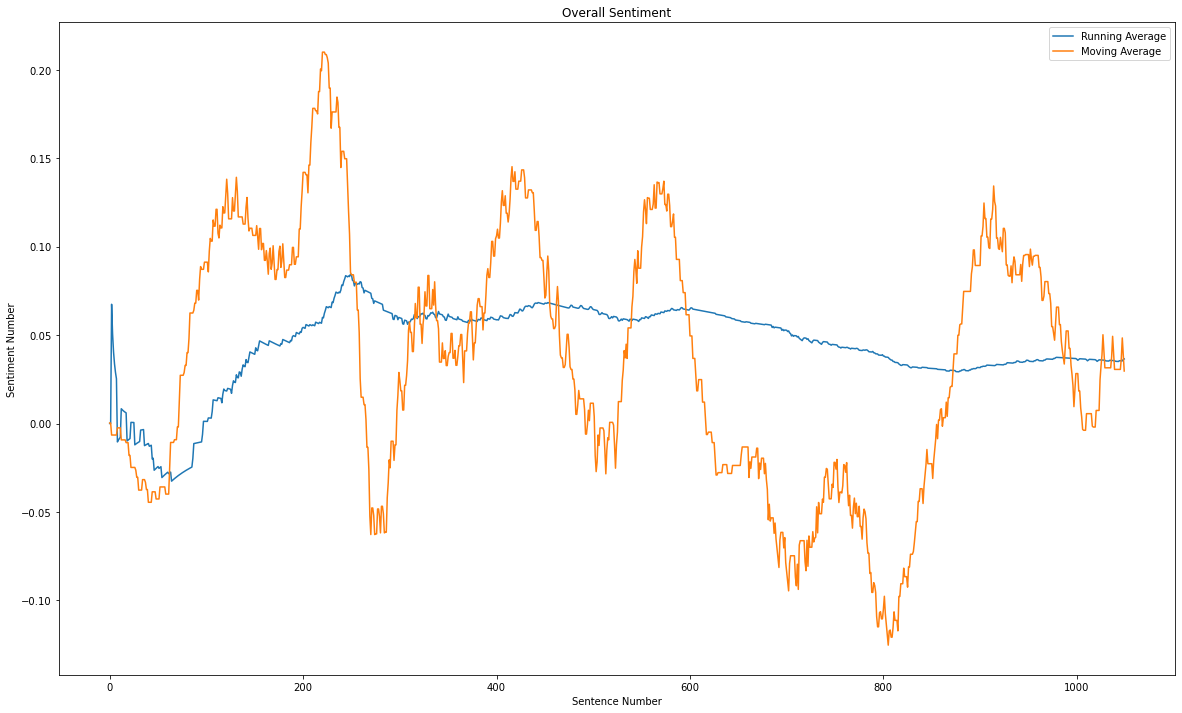

In [47]:
def moving_average(data, window_size):
    filter = np.ones((1,window_size))/window_size
    filter = filter[0,:]
    data = np.array(data)
    filtered_data = np.convolve(data, filter, 'same')
    return filtered_data

movingAverage = moving_average(sentiments, 50)

x_axis = list(range(0,len(sentiments)))
plt.plot(list(range(0,len(running_avg))), running_avg, label = 'Running Average')
plt.plot(list(range(0,len(movingAverage))), movingAverage, label='Moving Average')
plt.title('Overall Sentiment')
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment Number')
plt.legend()
image = plt.gcf()
image.set_size_inches(20, 12)
image.savefig('Output.png', dpi=100)
